# Testing

In [1]:
# Imports related to plotting and LaTeX
import matplotlib.pyplot as plt
from IPython.display import display, Math
def show(arg):
    return display(Math(arg.to_latex()))

In [2]:
# Imports related to mathematics
import numpy as np
from abelian import LCA, Homomorphism, Function
from sympy import Rational, pi

## Fourier series for $f(x) = x$ defined on $T$

In this example we compute the Fourier series coefficients for
$f(x) = x$ with domain $T = \mathbb{R}/\mathbb{Z}$ using `abelian`. 

We start by defining the function on the domain.

In [3]:
def identity(arg_list):
    x = arg_list[0] # First element of vector/list
    return x

# Create the domain T and a function on it
T = LCA(periods = [1], discrete = [False])
function = Function(identity, T)
show(function)

<IPython.core.display.Math object>

Then we create a monomorphism $\phi_\text{sample}$ to sample the function.

We make use for the `Rational` class to avoid numerical errors.

In [4]:
# Set up the number of sample points
n = 32

# Create the source of the monomorphism
Z_n = LCA([n]) 
phi_sample = Homomorphism([Rational(1, n)], source = Z_n, target = T)
show(phi_sample)

<IPython.core.display.Math object>

Sample the function, take DFT, and use a transversal rule and along with $\widehat{\phi}_\text{sample}$ to push the function to $\widehat{T} = \mathbb{Z}$.

In [5]:
# Pullback along phi_sample
function_sampled = function.pullback(phi_sample)

# Take the DFT
function_sampled_dual = function_sampled.dft()

# Set up a transversal rule
def transversal_rule(arg_list):
    x = arg_list[0] # First element of vector/list
    if x < n/2:
        return [x]
    else:
        return [x - n]

# Calculate the Fourier series coefficients - the function on Z
coeffs = function_sampled_dual.transversal(phi_sample.dual(), transversal_rule)
show(coeffs)

<IPython.core.display.Math object>

Let us compare with the analytical solution, which is

$$c_k = 
  \begin{cases} 
   1/2 & \text{if } x = 0 \\
   i / 2 \pi k   & \text{else}.
  \end{cases}$$

In [6]:
# Set up a function for the analytical solution
def analytical(k):
    if k == 0:
        return 1/2
    else:
        return complex(0, 1)/(2*pi*k)

# Sample the analytical and computed functions
sample_values = list(range(-n, n+1))
analytical_sampled = list(map(analytical, sample_values))
computed_samled = coeffs.sample(sample_values)

And create a plot. Notice how the computed values drop to zero outside of the transversal region.

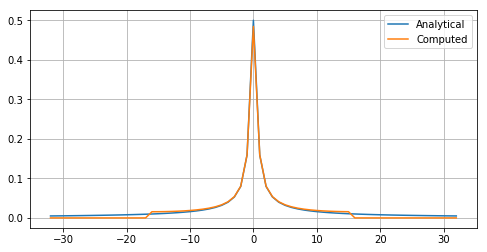

In [7]:
# Convert to absolute values
length = lambda x: float(abs(x))
analytical_sampled_length = list(map(length, analytical_sampled))
computed_samled_length = list(map(length, computed_samled))

# Plot it
plt.figure(figsize = (8,4))
plt.plot(sample_values, analytical_sampled_length, label = 'Analytical')
plt.plot(sample_values, computed_samled_length, label = 'Computed')
plt.grid(True)
plt.legend(loc = 'best')
plt.show()

## Image subsampling

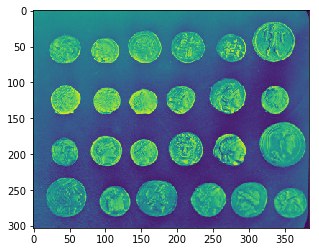

In [8]:
from skimage import data, img_as_float

# Import an image
image = img_as_float(data.coins())
plt.imshow(image)
plt.show()

In [9]:
image.shape

(303, 384)

In [10]:
domain = LCA(list(image.shape))
function = Function(image.tolist(), domain)

In [11]:
phi_sample = Homomorphism([[3, 0], [0, 3]], target = domain)
phi_sample = phi_sample.project_to_source()
show(phi_sample)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

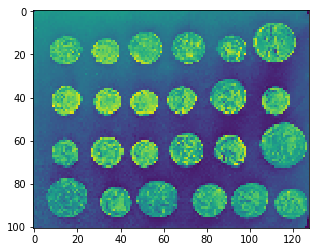

In [12]:
sampled = function.pullback(phi_sample)
show(sampled)
table = sampled.to_table()
plt.imshow(np.abs(table))
plt.show()

In [13]:
phi_sample = Homomorphism([1, 128], target = domain)
phi_sample = phi_sample.image().project_to_source().project_to_target()
show(phi_sample)

print('Sampled density:', (phi_sample.source.periods[0])/ (303*384))

<IPython.core.display.Math object>

Sampled density: 1/384


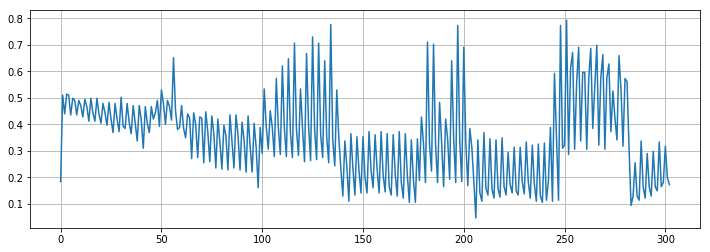

In [14]:
sampled_function = function.pullback(phi_sample)
sampled_data = sampled_function.to_table()
plt.figure(figsize = (12, 4))
plt.plot(np.abs(sampled_data))
plt.grid(True)
plt.show()

## Generator subsampling

In [49]:
domain = LCA([2, 3])
func_Z2_Z3 = Function([[1, 0, 1], 
                      [0, 1, 0]], domain)

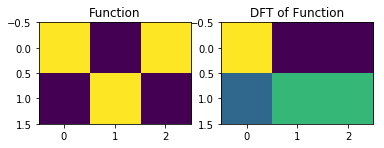

<IPython.core.display.Math object>

In [50]:
plt.subplot(1, 2, 1)
plt.title('Function')
plt.imshow(func_Z2_Z3.to_table())


func_Z2_Z3_dft = func_Z2_Z3.dft()
plt.subplot(1, 2, 2)
plt.title('DFT of Function')
plt.imshow(np.abs(func_Z2_Z3_dft.to_table()))
plt.show()

phi = Homomorphism([1, 1], target = domain)
phi = phi.project_to_source()
show(phi)

Function on Z_6 [ 1.+0.j  1.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
DFT of Function on Z_6 [ 0.5+0.j   0.2-0.3j  0.0+0.j   0.2-0.j   0.0+0.j   0.2+0.3j]


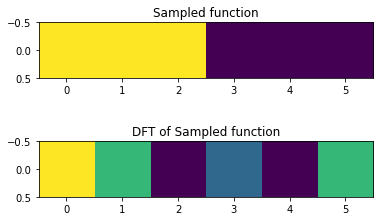

In [48]:
plt.subplot(2, 1, 1)
plt.title('Sampled function')
func_Z6 = func_Z2_Z3.pullback(phi)
print('Function on Z_6', func_Z6.to_table())
plt.imshow(np.abs(func_Z6.to_table()).reshape(1, -1))

func_Z6_dft = func_Z6.dft()

plt.subplot(2, 1, 2)
plt.title('DFT of Sampled function')
dft_table = np.array(np.abs(func_Z6_dft.to_table()), dtype=float)
print('DFT of Function on Z_6', np.round(np.array(func_Z6_dft.to_table(), dtype = complex), 1))
plt.imshow(dft_table.reshape(1, -1))
plt.show()

In [72]:
show((phi * phi.dual()).project_to_target())

<IPython.core.display.Math object>

In [63]:
show(phi.dual() * phi)
for i in range(1, 7):
    y = phi([i])
    print(i, y, phi.dual()(y))
    

<IPython.core.display.Math object>

1 [1, 1] [5]
2 [0, 2] [4]
3 [1, 0] [3]
4 [0, 1] [2]
5 [1, 2] [1]
6 [0, 0] [0]


In [80]:
epimorphism = Homomorphism([[3,4]], source = [2, 3], target = [6])
show(epimorphism)
func_dft = func_Z6_dft.transversal(epimorphism = epimorphism, transversal_rule = phi)

<IPython.core.display.Math object>

[[ 0.5+0.j   0.0+0.j   0.0+0.j ]
 [ 0.2+0.j   0.2+0.3j  0.2-0.3j]]
[[ 0.5+0.j   0.0+0.j   0.0+0.j ]
 [ 0.2-0.j   0.2-0.3j  0.2+0.3j]]


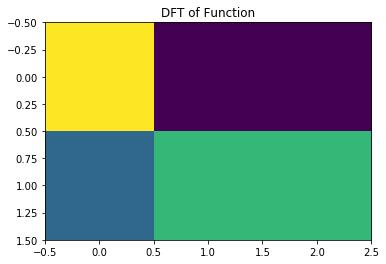

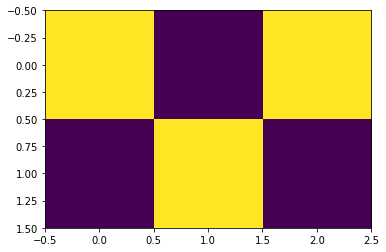

In [81]:
print(np.round(np.array(func_Z2_Z3_dft.to_table(), dtype = complex), 1))
plt.title('DFT of Function')
print(np.round(func_dft.to_table(), 1))
dft_table = np.abs(func_dft.to_table())
dft_table = np.array(dft_table, dtype=float)
plt.imshow(dft_table)
plt.show()


dft_table = np.abs(func_dft.dft().to_table())
dft_table = np.array(dft_table, dtype=float)
plt.imshow(dft_table)
plt.show()

In [61]:
test = Function([1,2,3,4,5,6], LCA([6]))
show(phi)
show(phi.dual())
for i in range(1, 7):
    print(i, (phi * phi.dual())(phi([i])))
func_dft = test.transversal(epimorphism = phi.dual(), transversal_rule = phi)
print(func_dft.to_table())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

1 [1, 2]
2 [0, 1]
3 [1, 0]
4 [0, 2]
5 [1, 1]
6 [0, 0]
[[ 1.+0.j  0.+0.j  0.+0.j]
 [ 4.+0.j  0.+0.j  0.+0.j]]


## Test 2

In [131]:
def showfunc(function):
    data = np.abs(function.to_table())
    data = np.array(data, dtype = float)
    try:
        plt.imshow(data, vmin=0, vmax=4)
    except TypeError:
        data = data.reshape(1, -1)
        plt.imshow(data, vmin=0, vmax=4)
    finally:
        plt.show()

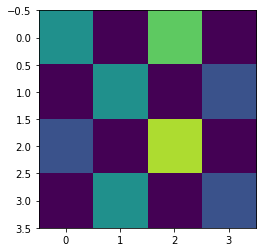

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [132]:
from sympy import Matrix

domain = LCA([4, 4])
function = Function([[2,0,3,0], [0,2,0,1], [1,0,3.5,0], [0,2,0,1]], domain = domain)
showfunc(function)

phi = Homomorphism([[2, 0], [0, 2]], target = [4,4])
phi = phi.project_to_source()
show(phi)
show(phi.dual())

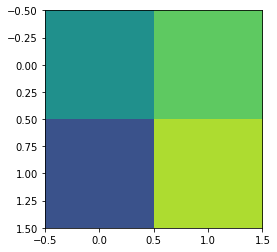

In [133]:
showfunc(function.pullback(phi))

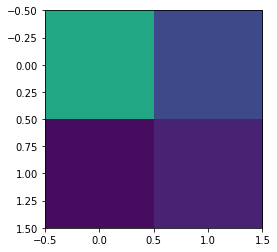

In [134]:
showfunc(function.pullback(phi).dft())

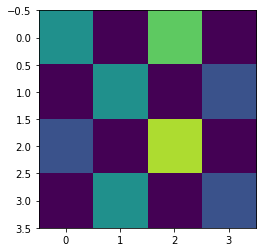

In [135]:
showfunc(function.dft().idft())

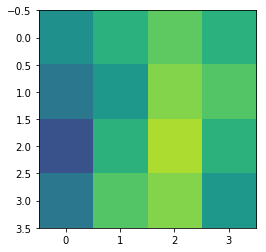

In [136]:
def transversal_rule(x):
    return x


showfunc(function.pullback(phi).dft().transversal(phi.dual(), transversal_rule).idft())

## Test 3

<IPython.core.display.Math object>

<IPython.core.display.Math object>

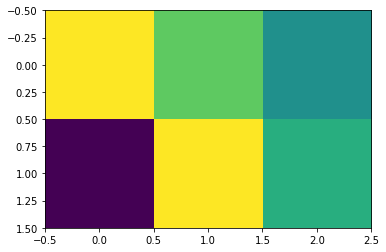

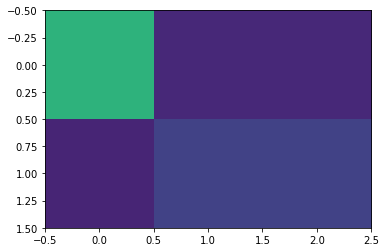

In [186]:
domain = LCA([2, 3])
function = Function([[4, 3, 2], 
                      [0, 4, 2.5]], domain)

phi = Homomorphism([1, 1], target = domain)
phi = phi.project_to_source()
show(phi)
show(phi.dual().kernel())
showfunc(function)
showfunc(function.dft())

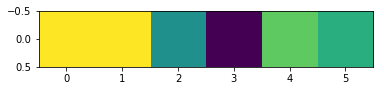

In [187]:
showfunc(function.pullback(phi))

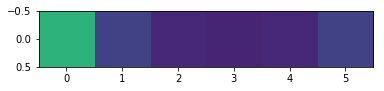

In [188]:
showfunc(function.pullback(phi).dft())

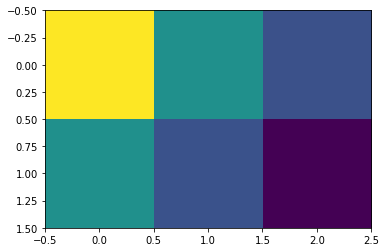

In [169]:
showfunc(function.dft().idft())

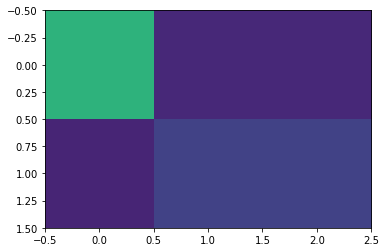

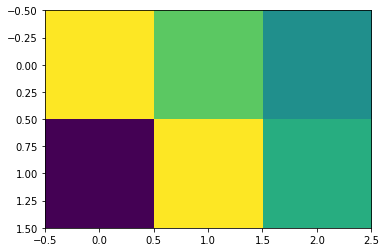

In [190]:
import itertools
def transversal_rule(x):
    for p in itertools.product(range(2), range(3)):
        p = list(p)
        if phi.dual()(p) == x:
            return p

showfunc(function.pullback(phi).dft().transversal(phi.dual(), transversal_rule))
showfunc(function.pullback(phi).dft().transversal(phi.dual(), transversal_rule).idft())

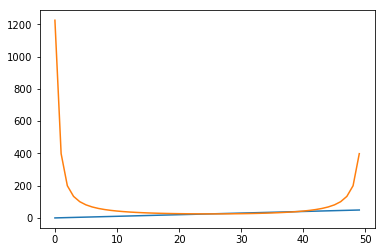

In [171]:
x = np.arange(50)
plt.plot(x)
plt.plot(np.abs(np.fft.fft(x)))
plt.show()

In [160]:
phi = Homomorphism([10], [100])
phi = phi.project_to_source()
show(phi.cokernel())

<IPython.core.display.Math object>

In [153]:
phi = Homomorphism([1], source = [6], target = [3])
show(phi)
show(phi.kernel().project_to_source())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

### Test 3

[[4.0, 4.0, 4.0, 4.0, 4.0], [4.0, 3.680177658517293, 3.3859268995624565, 3.1152031322856195, 2.866125242295157], [4.0, 3.3859268995624565, 2.866125242295157, 2.4261226388505337, 2.053668476130368], [4.0, 3.1152031322856195, 2.4261226388505337, 1.8894662109640588, 1.4715177646857693], [4.0, 2.866125242295157, 2.053668476130368, 1.4715177646857693, 1.054388552462907]]


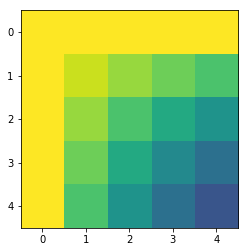

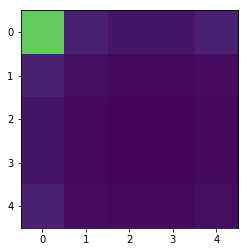

In [219]:
x, y = np.ogrid[0:5, 0:5]
data = 4*np.exp(-x*y/12)
print(data.tolist())
domain = LCA([5, 5])
function = Function(data, domain)

showfunc(function)
showfunc(function.dft())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

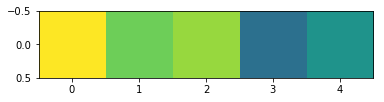

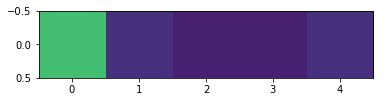

In [229]:
phi = Homomorphism([1, 3], target = domain)
phi = phi.project_to_source()
show(phi)
show(phi.dual().kernel().project_to_source())

showfunc(function.pullback(phi))
showfunc(function.pullback(phi).dft())

{(0, 0): [0], (0, 1): [3], (0, 2): [1], (0, 3): [4], (0, 4): [2], (1, 0): [1], (1, 1): [4], (1, 2): [2], (1, 3): [0], (1, 4): [3], (2, 0): [2], (2, 1): [0], (2, 2): [3], (2, 3): [1], (2, 4): [4], (3, 0): [3], (3, 1): [1], (3, 2): [4], (3, 3): [2], (3, 4): [0], (4, 0): [4], (4, 1): [2], (4, 2): [0], (4, 3): [3], (4, 4): [1]}


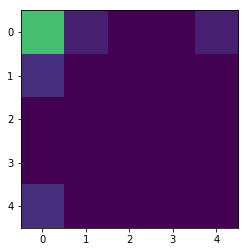

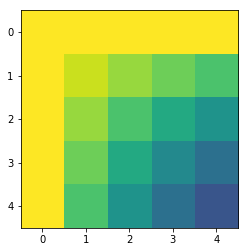

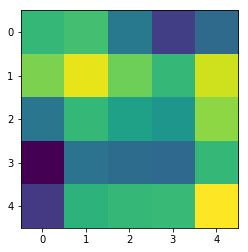

array([[  8.88178420e-16,   9.06200821e-02,  -6.73300278e-01,
         -1.23604911e+00,  -8.19926651e-01],
       [  3.51252240e-01,   7.61694664e-01,   2.92025062e-01,
          1.33226763e-15,   6.65200347e-01],
       [ -7.04693183e-01,   8.88178420e-16,  -2.44118703e-01,
         -3.66864929e-01,   4.21711690e-01],
       [ -1.70855558e+00,  -7.33138634e-01,  -8.07978501e-01,
         -8.34070903e-01,  -6.66133815e-16],
       [ -1.27303125e+00,  -4.85364058e-02,  -4.44089210e-16,
          1.94018819e-02,   8.52653551e-01]])

In [266]:
phi_dual = phi.dual()
phi_dual_kernel = phi_dual.kernel()
dual_mapping_dict = {x:phi_dual(list(x)) for x in itertools.product(range(5), range(5))}
print(dual_mapping_dict)


def distance(space, arg):
    return [min(abs(a), abs(a-s)) for (s, a) in zip(space, arg)]

def minimal_distance(space, args):
    return min((arg for arg in args), key = lambda arg: sum(distance(space, arg)))

def transversal_rule(x):
    candidates = []
    for i,j in dual_mapping_dict.items():
        i, j = list(i), list(j)
        if not j == x:
            continue
        candidates.append(i)
        
    answer = (minimal_distance([5,5], candidates))
    return answer
        
        
showfunc(function.pullback(phi).dft().transversal(phi.dual(), transversal_rule))
around = function.pullback(phi).dft().transversal(phi.dual(), transversal_rule).idft()
showfunc(function)

data1 = np.abs(around.to_table())
data1 = np.array(data1, dtype = float)
data2 = np.abs(function.to_table())
data2 = np.array(data2, dtype = float)
plt.imshow(data1 - data2)
plt.show()
data1 - data2

/home/tommy/anaconda3/envs/abelian/lib/python3.6/site-packages/ipykernel/__main__.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  app.launch_new_instance()


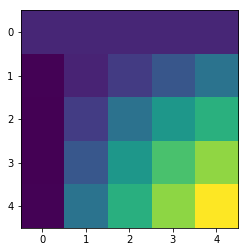

array([[-3.43894735, -3.43894735, -3.43894735, -3.43894735, -3.43894735],
       [-3.73329944, -3.45062678, -3.23471774, -2.96399397, -2.63657436],
       [-3.74722688, -3.22559206, -2.64407093, -2.20406832, -1.89333363],
       [-3.74722688, -2.95486829, -2.20406832, -1.6674119 , -1.31118292],
       [-3.73329944, -2.63657436, -1.90245931, -1.3203086 , -0.82483767]])

In [279]:
data = np.array(function.pullback(phi).dft().to_table(), dtype = complex)
data2 = np.eye(5)
data2[:, 0] = data
data2 = np.fft.ifft(data2)

plt.imshow(np.abs(data2) - np.abs(function.to_table()))
plt.show()

np.abs(data2) - np.abs(function.to_table())

In [300]:
phi = Homomorphism([2, 1], target = [10, 10])
phi = phi.project_to_source()
show(phi)
show(phi.dual())
show(phi.annihilator())

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

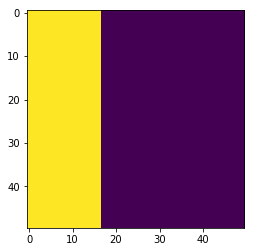

In [311]:
def max_norm(vector, weights):
    return max(v*w for (v, w) in zip(vector, weights))


weights = [1, 3]
m, n = 50, 50
data = np.zeros((m, n))
for m, n in itertools.product(*[range(m), range(n)]):
    vector = list((m, n))
    if max_norm(vector, weights) < 50:
        data[m, n] = 1
        

        
        
plt.imshow(data)
plt.show()